Data cleaning for density plot using the height of participants

In [1]:
import seaborn as sns # plot library I'll be using 
import pandas as pd 
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs
df1 = pd.read_csv('survey.csv')
df2 = pd.read_csv('steps.csv', sep=';')
df1.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [2]:
df2.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = pd.merge(df1, df2, on = 'id') #'id' is the common identifier
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 0 to 928
Columns: 337 entries, id to 13-5-2014
dtypes: float64(330), int64(3), object(4)
memory usage: 2.4+ MB


In [5]:
subset = df.mean(axis =0)

In [6]:
print(subset[10:337]) #subsetting the value to remove the NANs value in dataframe

25-6-2013    8690.810198
26-6-2013    8362.570122
27-6-2013    8261.913158
28-6-2013    9231.391408
29-6-2013    7202.258278
                ...     
9-5-2014     9570.690141
10-5-2014    7614.848837
11-5-2014    6805.925926
12-5-2014    7505.530303
13-5-2014            NaN
Length: 323, dtype: float64


In [7]:
subset = subset[10:337]

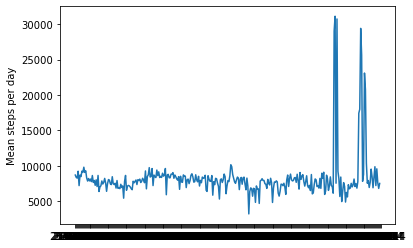

In [8]:
plt.plot(subset)
plt.ylabel('Mean steps per day')
plt.show()

C:\Users\sarah\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\sarah\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


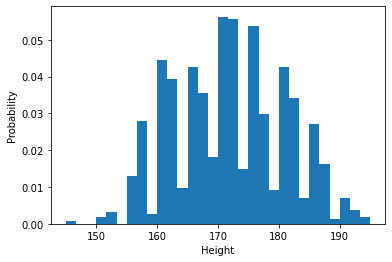

In [9]:
plt.hist(df['height'], density=True, bins=30)  # `density=False` make counts
plt.ylabel('Probability') #using probability vs height to get accurate predications of how possible it is for a height to occur
plt.xlabel('Height');

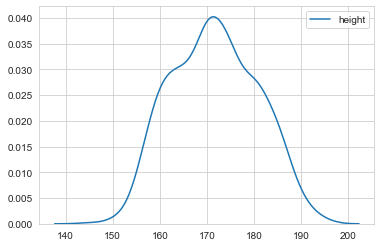

In [10]:
sns.set_style('whitegrid') 
sns.kdeplot(df['height'])

In [11]:
print(df['height'].mean()) #creating a new variable with the mean of all columns. mean is the average and meadian is the most common
print(df['height'].median())
print(df['height'].var()) #standard deviation squared


171.66810344827587
172.0
82.45067514786287


the mean of height per participants = 171.66810344827587
the median height of participants = 172.0
the height variable = 82.45067514786287
